In [2]:
#!pip install folium
#!pip install geopadas

In [47]:

#dados e geodados
import pandas as pd
import geopandas as gpd
# download de arquivos
import urllib.request
#visualização
import matplotlib.colors
import matplotlib.pyplot as plt
import folium
#exibição dos gráficos no notebook
%matplotlib inline


In [27]:
url = 'https://geoservicos.pbh.gov.br/geoserver/wfs?service=WFS&version=1.0.0&request=GetFeature&typeName=ide_bhgeo:POP_DOMIC_BAIRRO_2010&srsName=EPSG:31983&outputFormat=csv'
# baixe o arquivo da URL e salve com ’nome_do_arquivo.csv’
df1 = pd.read_csv(url)

#criar um geom a partir do csv
#cria coluna geom com o conteúdo de geometria
df1['geom'] = gpd.GeoSeries.from_wkt(df1['GEOMETRIA'])
df1.drop('GEOMETRIA', axis=1, inplace=True)

# Converte o objeto em um GeoDataFrame
df1 = gpd.GeoDataFrame(df1,  geometry='geom')

#ajusta o CRS
df1.crs = 'epsg:31983'

df1

,FID,ID_POP_DMC,NUM_BAIRRO,NOME_BAIRRO,POPULACAO,DOMICILIO,HAB_DOM,HAB_KM2,AREA_KM2,geom
0,POP_DOMIC_BAIRRO_2010.81,81,779,São Bento,3688,1130,3.26,3763,0.98,"MULTIPOLYGON (((608805.672 7793421.693, 608832..."
1,POP_DOMIC_BAIRRO_2010.82,82,1409,Vila Barragem Santa Lúcia,7999,2219,3.60,29408,0.27,"MULTIPOLYGON (((610721.940 7793495.947, 610726..."
2,POP_DOMIC_BAIRRO_2010.83,83,1275,Ápia,405,114,3.55,25313,0.02,"MULTIPOLYGON (((609259.721 7793449.087, 609264..."
3,POP_DOMIC_BAIRRO_2010.28,28,1168,Pilar,2946,896,3.29,2777,1.06,"MULTIPOLYGON (((606591.902 7788350.945, 606590..."
4,POP_DOMIC_BAIRRO_2010.29,29,657,Cruzeiro,8144,3024,2.69,15337,0.53,"MULTIPOLYGON (((612361.404 7794914.219, 612343..."
...,...,...,...,...,...,...,...,...,...,...
482,POP_DOMIC_BAIRRO_2010.11,11,1975,Vila Santa Mônica,2132,620,3.44,32303,0.07,"MULTIPOLYGON (((605640.669 7808248.425, 605638..."
483,POP_DOMIC_BAIRRO_2010.12,12,1662,Vila São Gabriel,420,131,3.21,19091,0.02,"MULTIPOLYGON (((613988.655 7805110.633, 613971..."
484,POP_DOMIC_BAIRRO_2010.13,13,1661,Vila Ouro Minas,588,159,3.70,21778,0.03,"MULTIPOLYGON (((614105.622 7805274.900, 614104..."
485,POP_DOMIC_BAIRRO_2010.14,14,1660,Vila da Luz,1491,447,3.34,21300,0.07,"MULTIPOLYGON (((615282.667 7804015.906, 615288..."


In [9]:
url = 'https://geoservicos.pbh.gov.br/geoserver/wfs?service=WFS&version=1.0.0&request=GetFeature&typeName=ide_bhgeo:CLASSIFICACAO_VIARIA_11181&srsName=EPSG:31983&outputFormat=application%2Fjson'
# baixe o arquivo da URL e salve com ’nome_do_arquivo.csv’
urllib.request.urlretrieve(url, 'clas_via.json')
df2 = gpd.read_file('clas_via.json')
df2

,id,ID_CLASSIFICACAO_VIARIA,TP_LOG,NO_LOG,CLASSIFICACAO_VIARIA,SUBDIVISAO_CLASSF_VIARIA,AFASTAMENTO_FRONTAL,TIPO_LARGURA_VIA,DESCRICAO_TIPO_LARGURA,geometry
0,CLASSIFICACAO_VIARIA_11181.48,48,PCA,DAS FLORES,LOCAL,NaN,0,A,LARGURA DA VIA < 10 m,"MULTILINESTRING ((606056.450 7799677.609, 6060..."
1,CLASSIFICACAO_VIARIA_11181.49,49,RUA,TRIANGULO,LOCAL,NaN,0,A,LARGURA DA VIA < 10 m,"MULTILINESTRING ((604957.321 7794454.347, 6049..."
2,CLASSIFICACAO_VIARIA_11181.50,50,RUA,PAI TOMAS,LOCAL,NaN,0,A,LARGURA DA VIA < 10 m,"MULTILINESTRING ((604913.186 7794415.438, 6049..."
3,CLASSIFICACAO_VIARIA_11181.51,51,RUA,MANOEL LISBOA,LOCAL,NaN,0,A,LARGURA DA VIA < 10 m,"MULTILINESTRING ((603123.609 7787300.439, 6030..."
4,CLASSIFICACAO_VIARIA_11181.52,52,RUA,DOS REVOLUCIONARIOS,LOCAL,NaN,0,B,10m <= LARGURA DA VIA < 15m,"MULTILINESTRING ((603123.609 7787300.439, 6031..."
...,...,...,...,...,...,...,...,...,...,...
53781,CLASSIFICACAO_VIARIA_11181.48762,48762,BEC,NOVO HORIZONTE,LOCAL,NaN,0,A,LARGURA DA VIA < 10 m,"MULTILINESTRING ((614896.872 7794880.554, 6149..."
53782,CLASSIFICACAO_VIARIA_11181.50371,50371,VDT,OSCAR NIEMEYER,ARTERIAL,NaN,NaN,C,LARGURA DA VIA >= 15m,"MULTILINESTRING ((608025.334 7805603.705, 6080..."
53783,CLASSIFICACAO_VIARIA_11181.48763,48763,RUA,CINCO DE OUTUBRO,LOCAL,NaN,0,A,LARGURA DA VIA < 10 m,"MULTILINESTRING ((601554.507 7787381.622, 6015..."
53784,CLASSIFICACAO_VIARIA_11181.48765,48765,RUA,PAULO CAMPOS MENDES,COLETORA,CP,0,B,10m <= LARGURA DA VIA < 15m,"MULTILINESTRING ((615806.575 7806923.484, 6158..."


In [10]:
url = 'https://geoservicos.pbh.gov.br/geoserver/wfs?service=WFS&version=1.0.0&request=GetFeature&typeName=ide_bhgeo:PONTO_ONIBUS&srsName=EPSG:31983&outputFormat=application%2Fjson'
# baixe o arquivo da URL e salve com ’nome_do_arquivo.csv’
urllib.request.urlretrieve(url, 'busão.json')
df3 = gpd.read_file('busão.json')
df3

,id,ID_PONTO_ONIBUS_LINHA,COD_LINHA,NOME_LINHA,NOME_SUB_LINHA,ORIGEM,IDENTIFICADOR_PONTO_ONIBUS,geometry
0,PONTO_ONIBUS.4809,4809,3052,ESTACAO DIAMANTE/BH SHOPPING-VIA HAVAI,HOSPITAIS VIA HAVAI- DOMINGO,ESTACAO DIAMANTE,141982,POINT (606068.780 7792916.280)
1,PONTO_ONIBUS.4810,4810,3052,ESTACAO DIAMANTE/BH SHOPPING-VIA HAVAI,HOSPITAIS VIA HAVAI- DOMINGO,ESTACAO DIAMANTE,189999,POINT (606074.870 7792896.650)
2,PONTO_ONIBUS.4811,4811,3052,ESTACAO DIAMANTE/BH SHOPPING-VIA HAVAI,HOSPITAIS VIA HAVAI- DOMINGO,ESTACAO DIAMANTE,190016,POINT (605872.110 7792743.370)
3,PONTO_ONIBUS.4812,4812,3052,ESTACAO DIAMANTE/BH SHOPPING-VIA HAVAI,HOSPITAIS VIA HAVAI- DOMINGO,ESTACAO DIAMANTE,51345,POINT (605790.370 7792697.550)
4,PONTO_ONIBUS.4813,4813,3052,ESTACAO DIAMANTE/BH SHOPPING-VIA HAVAI,HOSPITAIS VIA HAVAI- DOMINGO,ESTACAO DIAMANTE,178028,POINT (605695.000 7792544.230)
...,...,...,...,...,...,...,...,...
47863,PONTO_ONIBUS.3891,3891,3030,PILAR-OLHOS D AGUA / CENTRO,DESVIO FEIRA AFONSO PENA,PILAR-OLHOS D AGUA,29391,POINT (611340.070 7797330.860)
47864,PONTO_ONIBUS.3892,3892,3030,PILAR-OLHOS D AGUA / CENTRO,DESVIO FEIRA AFONSO PENA,PILAR-OLHOS D AGUA,344897,POINT (611355.490 7796329.370)
47865,PONTO_ONIBUS.3893,3893,3030,PILAR-OLHOS D AGUA / CENTRO,DESVIO FEIRA AFONSO PENA,PILAR-OLHOS D AGUA,18105,POINT (607332.510 7788200.090)
47866,PONTO_ONIBUS.3894,3894,3030,PILAR-OLHOS D AGUA / CENTRO,DESVIO FEIRA AFONSO PENA,PILAR-OLHOS D AGUA,364631,POINT (610839.400 7797046.120)


In [7]:
url = 'https://geoservicos.pbh.gov.br/geoserver/wfs?service=WFS&version=1.0.0&request=GetFeature&typeName=ide_bhgeo:ANTENA&srsName=EPSG:31983&outputFormat=SHAPE-ZIP'
# baixe o arquivo da URL e salve com ’nome_do_arquivo.csv’
urllib.request.urlretrieve(url, 'antena.zip')
df4 = gpd.read_file('antena.zip')
df4

,ID_ANTENA,DESCRICAO_,TIPO_SISTE,TIPO_FUNCA,CODIGO_ETR,NUMERO_LIC,DATA_CONCE,DATA_VALID,OUTRAS_LIC,CODIGO_SIT,...,FREQUENCIA,OBSERVACOE,DETENTORA,PRESTADORA,NUM_SETORE,AZIMUTE1,AZIMUTE2,AZIMUTE3,ALTURA,geometry
0,28.0,NaN,Compartilhado,Celular,19,1623/07,30/07/2007,27/07/2017,NaN,NaN,...,NaN,NaN,Claro,NaN,0.0,0.0,0.0,0.0,0.0,POINT (611490.164 7791681.897)
1,29.0,3GMGBEL2038/4GMGBEL0038,Próprio,Celular,3769,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Claro,NaN,0.0,0.0,0.0,0.0,0.0,POINT (611490.164 7791681.897)
2,30.0,NaN,Compartilhado,Celular,18,1512/07,22/12/2006,20/06/2007,NaN,NaN,...,NaN,NaN,Claro,NaN,0.0,0.0,0.0,0.0,0.0,POINT (611490.164 7791681.897)
3,31.0,NaN,Compartilhado,Celular,18,72/08,15/01/2008,21/12/2016,NaN,NaN,...,NaN,NaN,Claro,NaN,0.0,0.0,0.0,0.0,0.0,POINT (611490.164 7791681.897)
4,32.0,BELVEDERE COSTA REIS,Compartilhado,Celular,3470,0648/13,22/08/2013,22/02/2014,NaN,NaN,...,NaN,NaN,Claro,NaN,0.0,0.0,0.0,0.0,0.0,POINT (611490.164 7791681.897)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3253,2858.0,SALGADO FILHO,Próprio,Celular,1136,864/04,14/09/2004,13/03/2005,NaN,NaN,...,NaN,NaN,Vivo,NaN,0.0,0.0,0.0,0.0,9.0,POINT (606613.885 7794209.112)
3254,2859.0,SALGADO FILHO,Próprio,Celular,1136,1106/05,21/09/2005,20/09/2009,NaN,NaN,...,NaN,NaN,Vivo,NaN,0.0,0.0,0.0,0.0,9.0,POINT (606613.885 7794209.112)
3255,2860.0,SALGADO FILHO,Próprio,Celular,1136,307/09,02/10/2009,30/09/2019,NaN,NaN,...,NaN,NaN,Vivo,NaN,0.0,0.0,0.0,0.0,9.0,POINT (606613.885 7794209.112)
3256,2861.0,SABINO BARROSO COBRE,Próprio,Celular,888,963/11,21/12/2011,20/12/2021,NaN,NaN,...,NaN,NaN,Vivo,NaN,0.0,0.0,0.0,0.0,3.0,POINT (612438.659 7794253.683)


In [84]:
saida = 'sin492_at3_datasets_raw.gpkg'

gpd.GeoDataFrame(geometry = df1.geometry).to_file(saida, layer='POP_DOMIC_BAIRROS_2010', driver='GPKG')
gpd.GeoDataFrame(geometry = df2.geometry).to_file(saida, layer='CLASSIFICACAO_VIARIA_11181', driver='GPKG')
gpd.GeoDataFrame(geometry = df3.geometry).to_file(saida, layer='PONTO_ONIBUS', driver='GPKG')
gpd.GeoDataFrame(geometry = df4.geometry).to_file(saida, layer='ANTENAS', driver='GPKG')

In [23]:
# Obter os valores únicos de CLASSIFICACAO_VIARIA
classificacoes = df2['CLASSIFICACAO_VIARIA'].unique()
# Dividir o conjunto de dados em GeoDataFrames específicos para cada classificação funcional da via
gdframes = []
for classificacao in classificacoes:
    gdframe = df2.loc[df2['CLASSIFICACAO_VIARIA'] == classificacao]
    gdframes.append(gdframe)
# Exibir os GeoDataFrames resultantes
for i, gdframe in enumerate(gdframes):
    print(f"GeoDataFrame {i+1} - CLASSIFICACAO_VIARIA: {classificacoes[i]}")
    print(gdframe.head())
    print("\n")

GeoDataFrame 1 - CLASSIFICACAO_VIARIA: LOCAL
                              id  ID_CLASSIFICACAO_VIARIA TP_LOG   
0  CLASSIFICACAO_VIARIA_11181.48                       48    PCA  \
1  CLASSIFICACAO_VIARIA_11181.49                       49    RUA   
2  CLASSIFICACAO_VIARIA_11181.50                       50    RUA   
3  CLASSIFICACAO_VIARIA_11181.51                       51    RUA   
4  CLASSIFICACAO_VIARIA_11181.52                       52    RUA   

                NO_LOG CLASSIFICACAO_VIARIA SUBDIVISAO_CLASSF_VIARIA   
0           DAS FLORES                LOCAL                      NaN  \
1            TRIANGULO                LOCAL                      NaN   
2            PAI TOMAS                LOCAL                      NaN   
3        MANOEL LISBOA                LOCAL                      NaN   
4  DOS REVOLUCIONARIOS                LOCAL                      NaN   

  AFASTAMENTO_FRONTAL TIPO_LARGURA_VIA       DESCRICAO_TIPO_LARGURA   
0                   0                A    

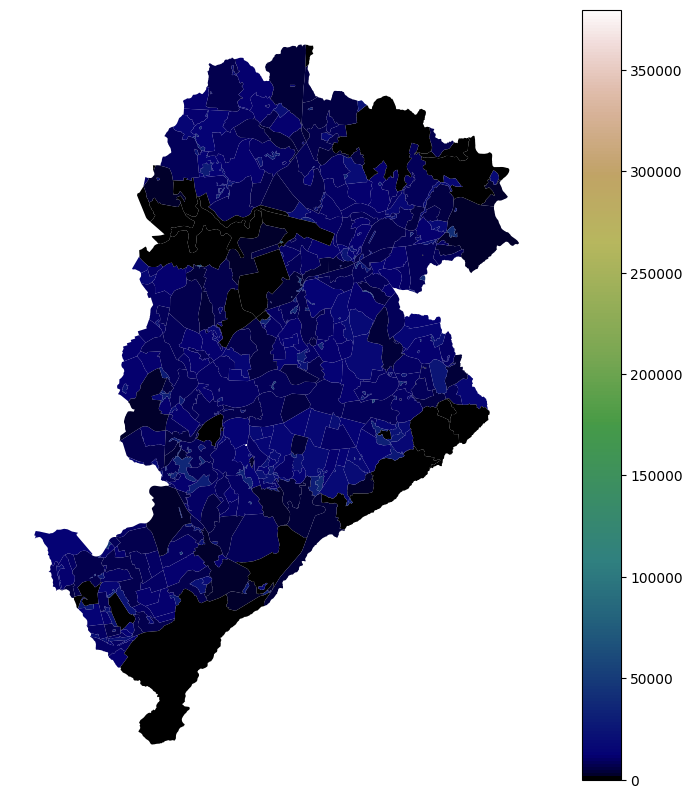

In [82]:
ax = df1.plot(column='HAB_KM2', figsize=(10,10), legend=True, cmap = 'gist_earth')
ax.set_axis_off()

# Exiba o mapa
plt.show()

C:\Users\kirit\AppData\Local\Temp\ipykernel_7900\2387178295.py:14: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


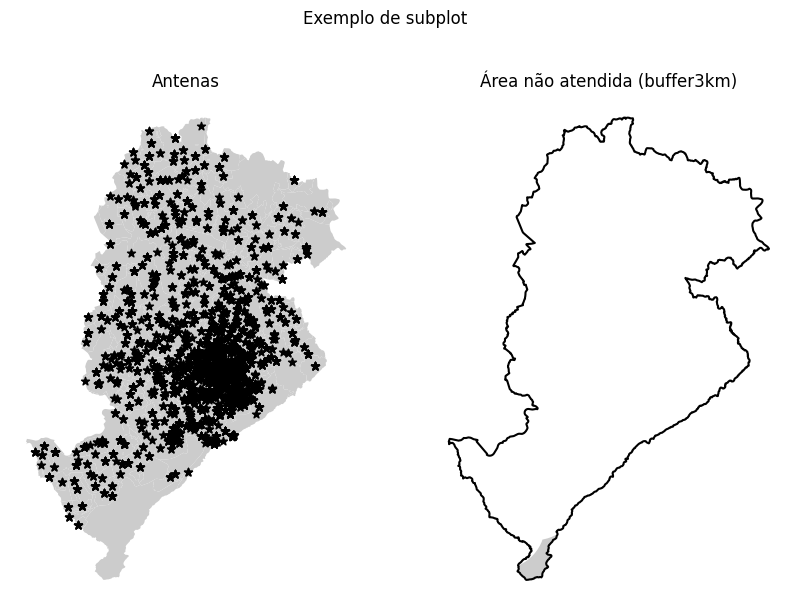

In [73]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,7))
df1.plot(ax=ax1, facecolor='0.8')
df4.plot(ax=ax1, color='black', marker='*')
gpd.GeoSeries(df1.unary_union.boundary).plot(ax=ax2, edgecolor='black')
area_antenas = df4.buffer(3000)
area_antenas = gpd.GeoDataFrame(area_antenas, geometry=area_antenas)
area_nao_atendida = df1.overlay(area_antenas, how='difference')
area_nao_atendida.plot(ax=ax2, color='0.8')
ax1.set_axis_off()
ax1.set_title('Antenas')
ax2.set_axis_off()
ax2.set_title('Área não atendida (buffer3km)')
fig.suptitle('Exemplo de subplot')
fig.show()


C:\Users\kirit\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\geopandas\plotting.py:695: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  warnings.warn(


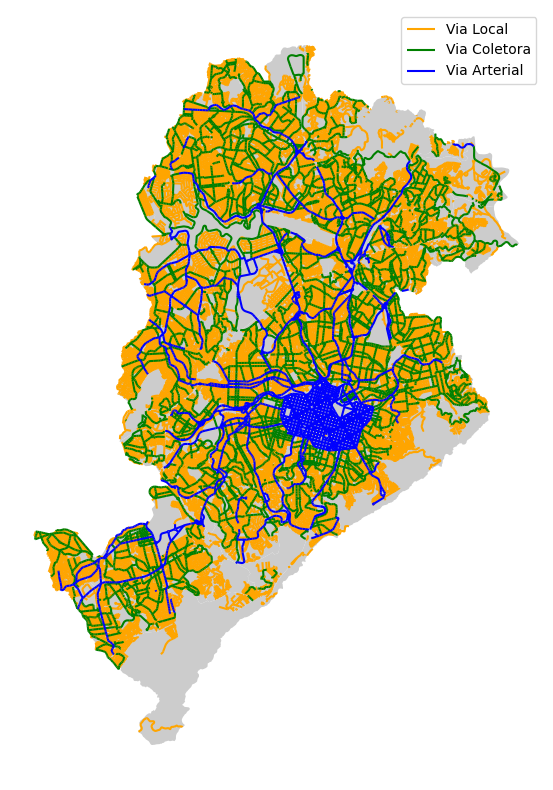

In [97]:
# Filtre com base na coluna CLASSIFICACAO_VIARIA
via_transito_rapido = df2[df2['CLASSIFICACAO_VIARIA'] == 'TRÂNSITO RÁPIDO']
via_arterial = df2[df2['CLASSIFICACAO_VIARIA'] == 'ARTERIAL']
via_coletora = df2[df2['CLASSIFICACAO_VIARIA'] == 'COLETORA']
via_local = df2[df2['CLASSIFICACAO_VIARIA'] == 'LOCAL']

# Plote o mapa de fundo
mapa_fundo = df1.plot(figsize=(10,10), facecolor='0.8')

# Plote cada tipo de via com uma aparência diferente
via_local.plot(ax=mapa_fundo, color='orange', label='Via Local')
via_coletora.plot(ax=mapa_fundo, color='green', label='Via Coletora')
via_arterial.plot(ax=mapa_fundo, color='blue', label='Via Arterial')
via_transito_rapido.plot(ax=mapa_fundo, color='red', label='Via de Trânsito Rápido')

# Ajuste a visualização
mapa_fundo.set_axis_off()

plt.legend()

# Exiba o mapa
plt.show()